In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
data = pd.read_csv("911.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624239 entries, 0 to 624238
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        624239 non-null  float64
 1   lng        624239 non-null  float64
 2   desc       624239 non-null  object 
 3   zip        548027 non-null  float64
 4   title      624239 non-null  object 
 5   timeStamp  624239 non-null  object 
 6   twp        623970 non-null  object 
 7   addr       624239 non-null  object 
 8   e          624239 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 42.9+ MB


In [4]:
data.describe()

,lat,lng,zip,e
count,624239.000000,624239.000000,548027.000000,624239.0
mean,40.157824,-75.301310,19235.784399,1.0
std,0.209972,1.592053,298.178388,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100055,-75.392104,19038.000000,1.0
50%,40.143598,-75.304780,19401.000000,1.0
75%,40.229008,-75.211866,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [5]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Converting to proper date time format and then making separate columns (using the lambda function) for each for better analysis. Ultimately we will delete the original date time column

In [6]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [7]:
data['Day'] = data['timeStamp'].apply(lambda time : time.dayofweek) 
data['Date'] = data['timeStamp'].apply(lambda time : time.day)
data['Month'] = data['timeStamp'].apply(lambda time : time.month)
data['Year'] = data['timeStamp'].apply(lambda time : time.year)
data['Hour'] = data['timeStamp'].apply(lambda time : time.hour)

In [8]:
data = data.drop(columns = ['timeStamp'], axis = 1)

In [9]:
map_weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['Day'] = data['Day'].map(map_weekdays)

In [10]:
def day_night(rec):
    if rec['Hour'] > 18:
        return 'Night'
    else:
        return 'Day'
data['Day/Night'] = data.apply(day_night, axis = 1)            

In [11]:
data.rename(columns = {'lat':'Lat', 'lng':'Long', 'desc':'Description', 'zip':'Zipcode', 'title':'Title', 'twp':'TownShip', 'addr':'Address'}, inplace = True)

In [12]:
#Extracting the reason of the phone call from the title
data['Reason'] = data['Title'].apply(lambda x : x.split(':')[0])
data['Full Reason'] = data['Title'].apply(lambda x: x.split(':')[1])

In [13]:
data.head()

,Lat,Long,Description,Zipcode,Title,TownShip,Address,e,Day,Date,Month,Year,Hour,Day/Night,Reason,Full Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,Thursday,10,12,2015,17,Day,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,Thursday,10,12,2015,17,Day,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Thursday,10,12,2015,14,Day,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,Thursday,10,12,2015,16,Day,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,Thursday,10,12,2015,16,Day,EMS,DIZZINESS


In [14]:
data['Reason'].value_counts(0)

EMS        310876
Traffic    219985
Fire        93378
Name: Reason, dtype: int64

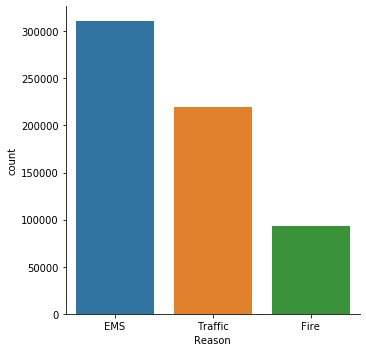

In [15]:
# WHAT IS THE FREQUENCY OF 911 CALLS FOR DIFFERENT REASONS AND HOW DO THEY COMPARE WITH EACH OTHER?
plot = sns.catplot(data = data, x = 'Reason', kind = 'count', order = ['EMS', 'Traffic', 'Fire'])

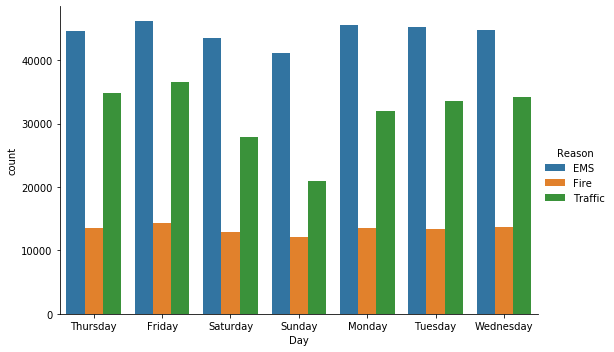

In [16]:
# IS THERE ANY RELATION WITH THE NUMBER OF CALLS (AND TYPE OF CALLS) ON DIFFERENT DAYS OF THE WEEK?
sns.catplot(data = data, x = 'Day', hue = 'Reason', kind = 'count', aspect = 1.5)

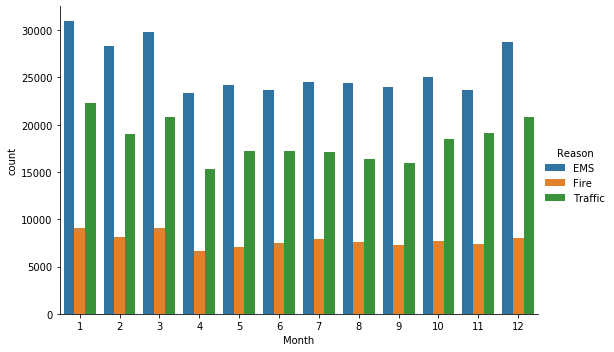

In [17]:
# IS THERE ANY REALTIONSHIP BETWEEN THE NUMBER OF 911 CALLS (AND TYPE OF CALLS) IN DIFFERENT MONTHS?
sns.catplot(data = data, x = 'Month', hue = 'Reason', kind = 'count', aspect = 1.5)

GROUPING CALLS BY MONTH

In [18]:
GroupByMonth = data.groupby(by = 'Month').count()

In [19]:
GroupByMonth = GroupByMonth.reset_index()
GroupByMonth.head(20)

,Month,Lat,Long,Description,Zipcode,Title,TownShip,Address,e,Day,Date,Year,Hour,Day/Night,Reason,Full Reason
0,1,62336,62336,62336,55294,62336,62312,62336,62336,62336,62336,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55405,55427,55427,55427,55427,55427,55427,55427,55427,55427
2,3,59831,59831,59831,53064,59831,59805,59831,59831,59831,59831,59831,59831,59831,59831,59831
3,4,45428,45428,45428,39810,45428,45414,45428,45428,45428,45428,45428,45428,45428,45428,45428
4,5,48467,48467,48467,42257,48467,48443,48467,48467,48467,48467,48467,48467,48467,48467,48467
5,6,48493,48493,48493,42223,48493,48466,48493,48493,48493,48493,48493,48493,48493,48493,48493
6,7,49571,49571,49571,43405,49571,49550,49571,49571,49571,49571,49571,49571,49571,49571,49571
7,8,48359,48359,48359,42311,48359,48335,48359,48359,48359,48359,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47196,47213,47213,47213,47213,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51220,51240,51240,51240,51240,51240,51240,51240,51240,51240


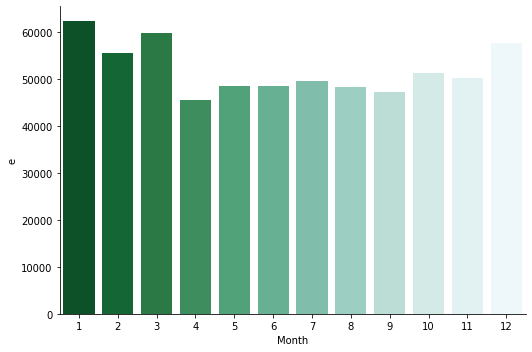

In [20]:
sns.catplot(x = 'Month', y = 'e', data = GroupByMonth, aspect = 1.5, kind = "bar", palette = "BuGn_r")

Text(0, 0.5, 'Number of Calls')

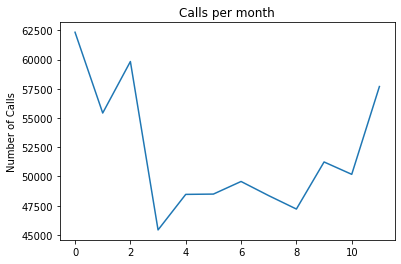

In [21]:
GroupByMonth['e'].plot.line()
plt.title("Calls per month")
plt.ylabel("Number of Calls")

Text(0.5, 1, 'Calls per Month')

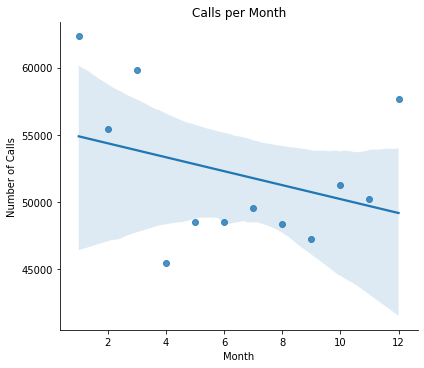

In [22]:
sns.lmplot(x = 'Month', y = 'e', data = GroupByMonth, aspect = 1.2)
plt.ylabel("Number of Calls")
plt.title("Calls per Month")

CHECKING A SIMILAR TREND FOR EACH TYPE OF CALL

GROUPING EMERGENCY CALLS

In [23]:
GroupByEMS = data[data['Reason'] == "EMS"]

In [24]:
GroupByEMS = GroupByEMS.groupby(by = 'Month').count()

In [25]:
GroupByEMS = GroupByEMS.reset_index()
GroupByEMS.head(20)

,Month,Lat,Long,Description,Zipcode,Title,TownShip,Address,e,Day,Date,Year,Hour,Day/Night,Reason,Full Reason
0,1,30970,30970,30970,28630,30970,30953,30970,30970,30970,30970,30970,30970,30970,30970,30970
1,2,28329,28329,28329,26046,28329,28311,28329,28329,28329,28329,28329,28329,28329,28329,28329
2,3,29854,29854,29854,27542,29854,29835,29854,29854,29854,29854,29854,29854,29854,29854,29854
3,4,23398,23398,23398,21388,23398,23388,23398,23398,23398,23398,23398,23398,23398,23398,23398
4,5,24211,24211,24211,22064,24211,24192,24211,24211,24211,24211,24211,24211,24211,24211,24211
5,6,23715,23715,23715,21514,23715,23694,23715,23715,23715,23715,23715,23715,23715,23715,23715
6,7,24492,24492,24492,22363,24492,24478,24492,24492,24492,24492,24492,24492,24492,24492,24492
7,8,24410,24410,24410,22252,24410,24391,24410,24410,24410,24410,24410,24410,24410,24410,24410
8,9,23982,23982,23982,21849,23982,23971,23982,23982,23982,23982,23982,23982,23982,23982,23982
9,10,25025,25025,25025,22719,25025,25012,25025,25025,25025,25025,25025,25025,25025,25025,25025


GROUPING TRAFFIC CALLS

In [26]:
GroupByTraffic = data[data['Reason'] == 'Traffic']

In [27]:
GroupByTraffic = GroupByTraffic.groupby(by = 'Month').count()

In [28]:
GroupByTraffic = GroupByTraffic.reset_index()
GroupByTraffic.head(20)

,Month,Lat,Long,Description,Zipcode,Title,TownShip,Address,e,Day,Date,Year,Hour,Day/Night,Reason,Full Reason
0,1,22279,22279,22279,18588,22279,22279,22279,22279,22279,22279,22279,22279,22279,22279,22279
1,2,19006,19006,19006,15751,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006,19006
2,3,20868,20868,20868,17426,20868,20868,20868,20868,20868,20868,20868,20868,20868,20868,20868
3,4,15338,15338,15338,12535,15338,15338,15338,15338,15338,15338,15338,15338,15338,15338,15338
4,5,17238,17238,17238,14072,17238,17238,17238,17238,17238,17238,17238,17238,17238,17238,17238
5,6,17272,17272,17272,14126,17272,17271,17272,17272,17272,17272,17272,17272,17272,17272,17272
6,7,17146,17146,17146,14034,17146,17144,17146,17146,17146,17146,17146,17146,17146,17146,17146
7,8,16351,16351,16351,13389,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351
8,9,15973,15973,15973,13070,15973,15973,15973,15973,15973,15973,15973,15973,15973,15973,15973
9,10,18532,18532,18532,15096,18532,18532,18532,18532,18532,18532,18532,18532,18532,18532,18532


GROUPING FIRE CALLS

In [29]:
GroupByFire = data[data['Reason'] == 'Fire']

In [30]:
GroupByFire = GroupByFire.groupby(by = 'Month').count()

In [31]:
GroupByFire = GroupByFire.reset_index()
GroupByFire.head(20)

,Month,Lat,Long,Description,Zipcode,Title,TownShip,Address,e,Day,Date,Year,Hour,Day/Night,Reason,Full Reason
0,1,9087,9087,9087,8076,9087,9080,9087,9087,9087,9087,9087,9087,9087,9087,9087
1,2,8092,8092,8092,7125,8092,8088,8092,8092,8092,8092,8092,8092,8092,8092,8092
2,3,9109,9109,9109,8096,9109,9102,9109,9109,9109,9109,9109,9109,9109,9109,9109
3,4,6692,6692,6692,5887,6692,6688,6692,6692,6692,6692,6692,6692,6692,6692,6692
4,5,7018,7018,7018,6121,7018,7013,7018,7018,7018,7018,7018,7018,7018,7018,7018
5,6,7506,7506,7506,6583,7506,7501,7506,7506,7506,7506,7506,7506,7506,7506,7506
6,7,7933,7933,7933,7008,7933,7928,7933,7933,7933,7933,7933,7933,7933,7933,7933
7,8,7598,7598,7598,6670,7598,7593,7598,7598,7598,7598,7598,7598,7598,7598,7598
8,9,7258,7258,7258,6370,7258,7252,7258,7258,7258,7258,7258,7258,7258,7258,7258
9,10,7683,7683,7683,6767,7683,7676,7683,7683,7683,7683,7683,7683,7683,7683,7683


PLOTTING THE RESULTS

Text(0, 0.5, 'Number of Calls')

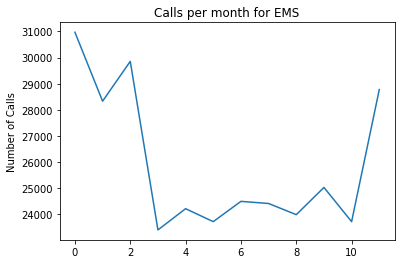

In [32]:
GroupByEMS['e'].plot.line()
plt.title("Calls per month for EMS")
plt.ylabel("Number of Calls")

Text(0.5, 1, 'Calls per Month for EMS')

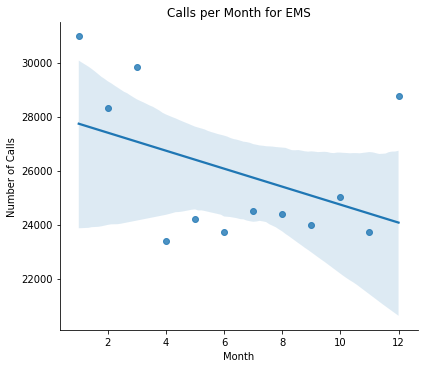

In [33]:
sns.lmplot(x = 'Month', y = 'e', data = GroupByEMS, aspect = 1.2)
plt.ylabel("Number of Calls")
plt.title("Calls per Month for EMS")

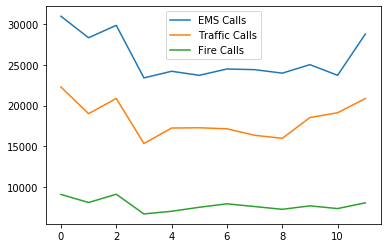

In [34]:
#Renaming the 'e' columns of the 3 data bases because it is of use now.
GroupByEMS.rename(columns = {'e':'EMS Calls'}, inplace = True)
GroupByTraffic.rename(columns = {'e':'Traffic Calls'}, inplace = True)
GroupByFire.rename(columns = {'e':'Fire Calls'}, inplace = True)
#Plotting the 3 calls in a single line chart
GroupByEMS['EMS Calls'].plot.line()
GroupByTraffic['Traffic Calls'].plot.line()
GroupByFire['Fire Calls'].plot.line()
plt.legend()

FINALLY WE MAKE A HEATMAP SHOWING CALL DENSITY FOR DIFFERENT HOURS OF EVERY DAY OF THE WEEK

In [35]:
# we need to use the values attribute to restrict the pivot table from taking values multiple times i.e. once for each column
hourly_call_density = pd.pivot_table(data = data, index = 'Day', columns = 'Hour', values = 'e', aggfunc = 'sum')

In [36]:
hourly_call_density

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Friday,1850,1519,1356,1231,1228,1540,2542,3962,4791,4986,...,6024,6628,6688,6754,5340,4761,4094,3651,3219,2681
Monday,1766,1460,1279,1187,1256,1732,2555,4250,5281,5436,...,5318,5826,5993,6085,5142,4221,3546,3045,2484,1941
Saturday,2294,1939,1794,1498,1361,1478,1767,2378,3277,4083,...,5106,4870,4891,4907,4706,4486,3901,3660,3030,2794
Sunday,2289,2024,1829,1519,1388,1381,1643,2268,2843,3523,...,4426,4205,4262,4247,4133,3918,3507,2946,2450,2175
Thursday,1611,1309,1324,1159,1183,1665,2677,4264,5085,5097,...,5671,6100,5989,6589,5208,4414,3843,3285,2666,2208
Tuesday,1610,1362,1250,1144,1167,1649,2658,4220,5377,5277,...,5557,5911,6142,6554,5327,4313,3609,3201,2527,1979
Wednesday,1559,1382,1187,1184,1039,1503,2533,4458,5230,5149,...,5601,6109,6373,6645,5327,4414,3851,3305,2625,2070


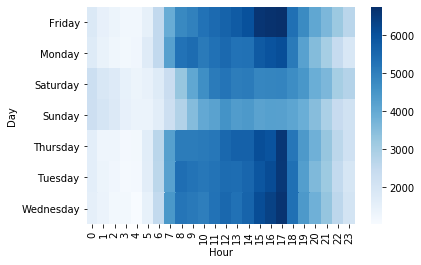

In [37]:
sns.heatmap(hourly_call_density, cmap = 'Blues')

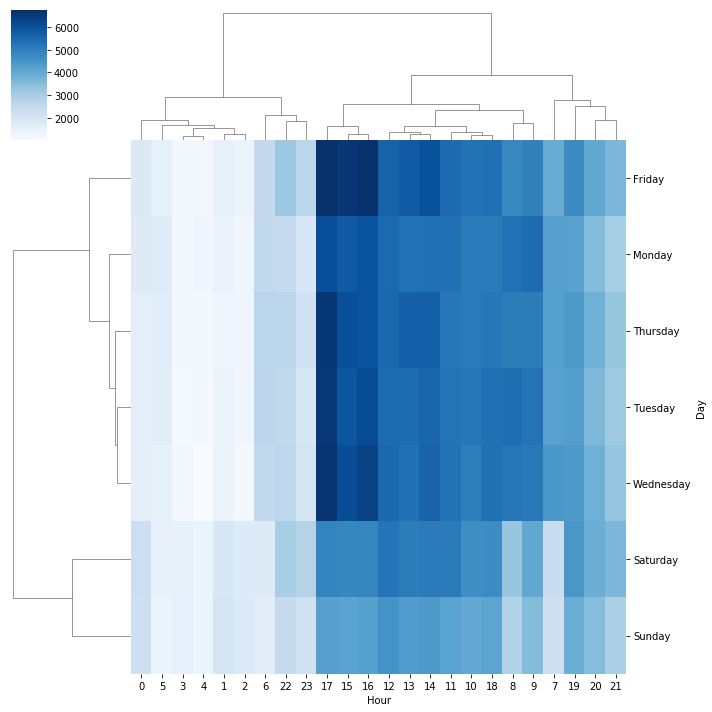

In [38]:
sns.clustermap(hourly_call_density, cmap = 'Blues')

NOW WE GROUP DATA BY LAT and LONG and scatter plot over a map

In [39]:
data['Lat'] = data['Lat'].apply(lambda x : round(x,3))
data['Long'] = data['Long'].apply(lambda x : round(x,3))

In [40]:
data.head()

,Lat,Long,Description,Zipcode,Title,TownShip,Address,e,Day,Date,Month,Year,Hour,Day/Night,Reason,Full Reason
0,40.298,-75.581,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,Thursday,10,12,2015,17,Day,EMS,BACK PAINS/INJURY
1,40.258,-75.265,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,Thursday,10,12,2015,17,Day,EMS,DIABETIC EMERGENCY
2,40.121,-75.352,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Thursday,10,12,2015,14,Day,Fire,GAS-ODOR/LEAK
3,40.116,-75.344,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,Thursday,10,12,2015,16,Day,EMS,CARDIAC EMERGENCY
4,40.251,-75.603,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,Thursday,10,12,2015,16,Day,EMS,DIZZINESS


In [41]:
def generate_LatLong(entry):
    return((entry['Lat'], entry['Long']))

data['LatLong'] = data.apply(generate_LatLong, axis = 1)

In [42]:
data_map = data.groupby(by = 'LatLong').count()

In [43]:
data_map.head()

,Lat,Long,Description,Zipcode,Title,TownShip,Address,e,Day,Date,Month,Year,Hour,Day/Night,Reason,Full Reason
LatLong,,,,,,,,,,,,,,,,
"(0.0, 0.0)",2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
"(22.987, 87.855)",57,57,57,7,57,57,57,57,57,57,57,57,57,57,57,57
"(26.821, 30.802)",1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
"(30.334, -95.596)",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"(32.379, -86.308)",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [44]:
px.scatter_mapbox?

In [45]:
#fig = px.scatter_mapbox(data_frame = data_map, lat = 'Lat', lon = 'Long', size = 'e', size_max=15, zoom=10)
#fig.show()

In [46]:
long_min = data['Long'].min()
long_max = data['Long'].max()
lat_min = data['Lat'].min()
lat_max = data['Lat'].max()